# Prezentacja danych datasetu SWaT

### Wczytanie danych

In [1]:
import pandas as pd

df1 = pd.read_csv('SWaT_Dataset_Attack_v0.csv', sep=';', decimal=',', low_memory=False)

In [2]:
df2 = pd.read_csv('SWaT_Dataset_Normal_v1.csv', decimal=',')

In [3]:
print(df1.shape)
print(df2.shape)

attack_count1 = (df1[df1.columns[-1]] == "Attack").sum()
print(f'Liczba wierszy z "Attack" w ostatniej kolumnie: {attack_count1}')
attack_count2 = (df2[df2.columns[-1]] == "Attack").sum()
print(f'Liczba wierszy z "Attack" w ostatniej kolumnie: {attack_count2}')

(449919, 53)
(495000, 53)
Liczba wierszy z "Attack" w ostatniej kolumnie: 54584
Liczba wierszy z "Attack" w ostatniej kolumnie: 0


In [4]:
df1.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [5]:
df2.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal


### Dane z czujników na wykresie

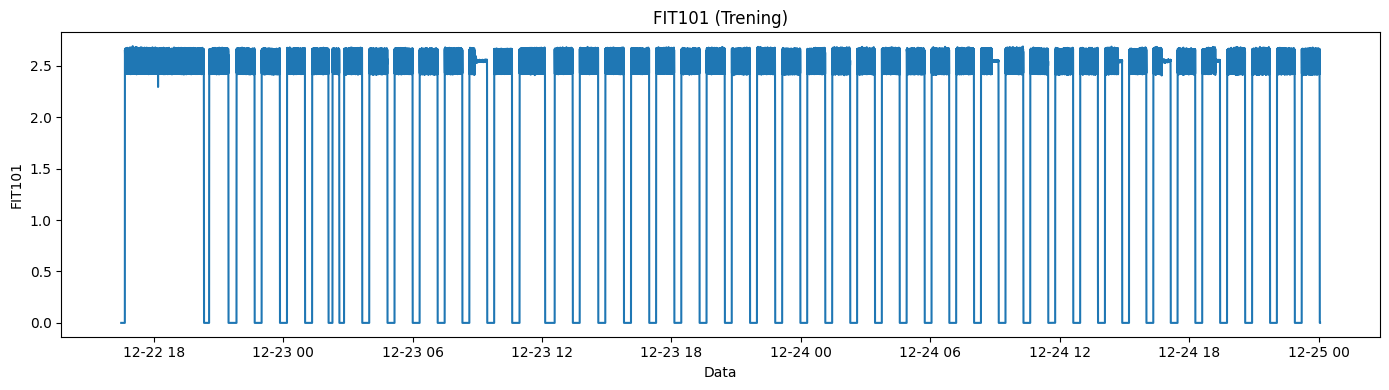

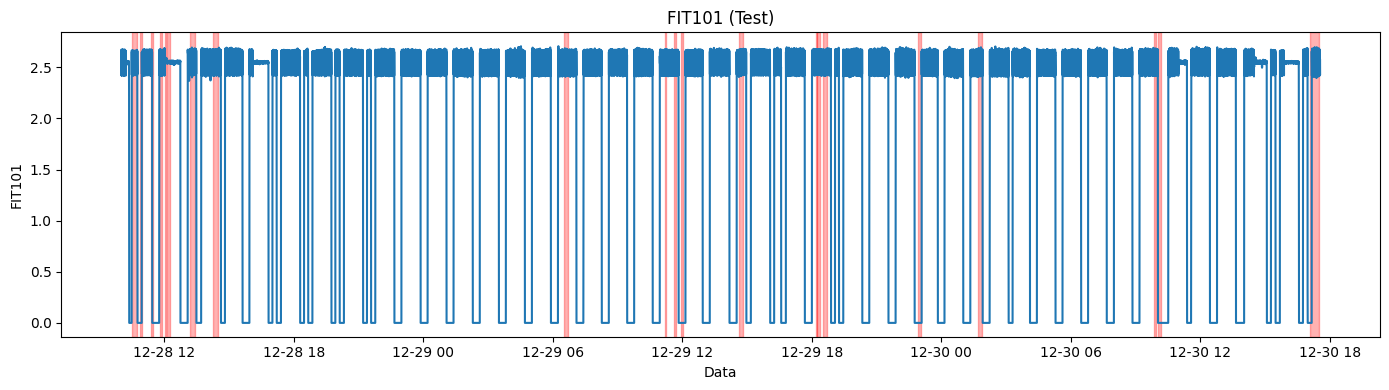

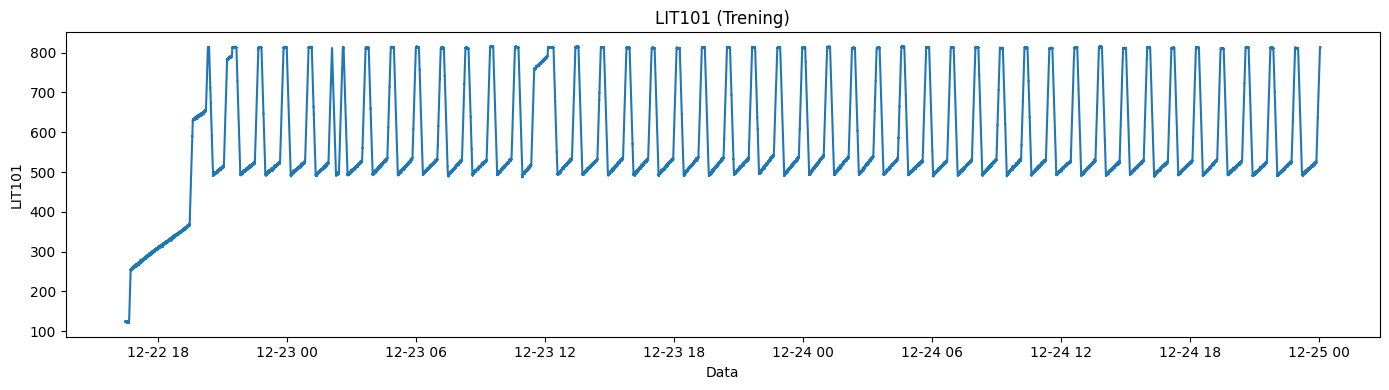

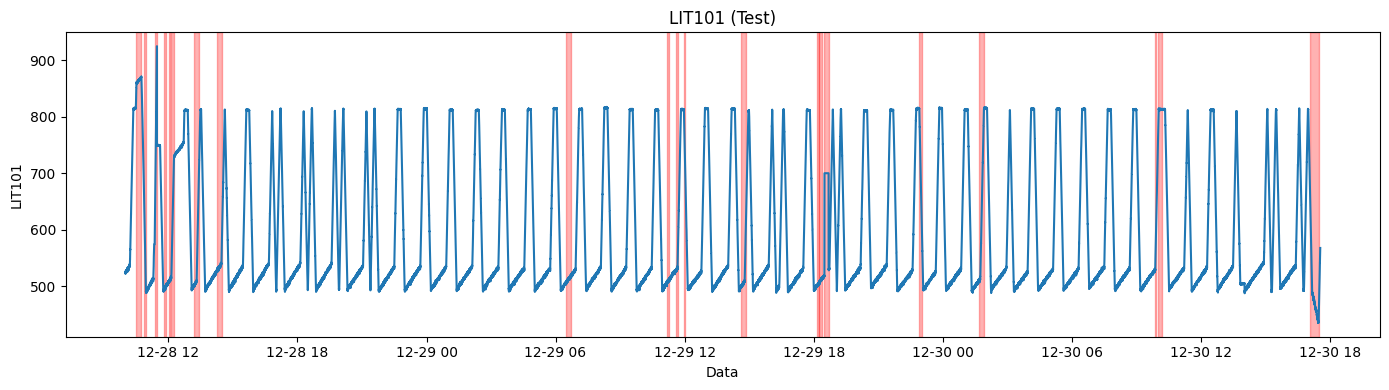

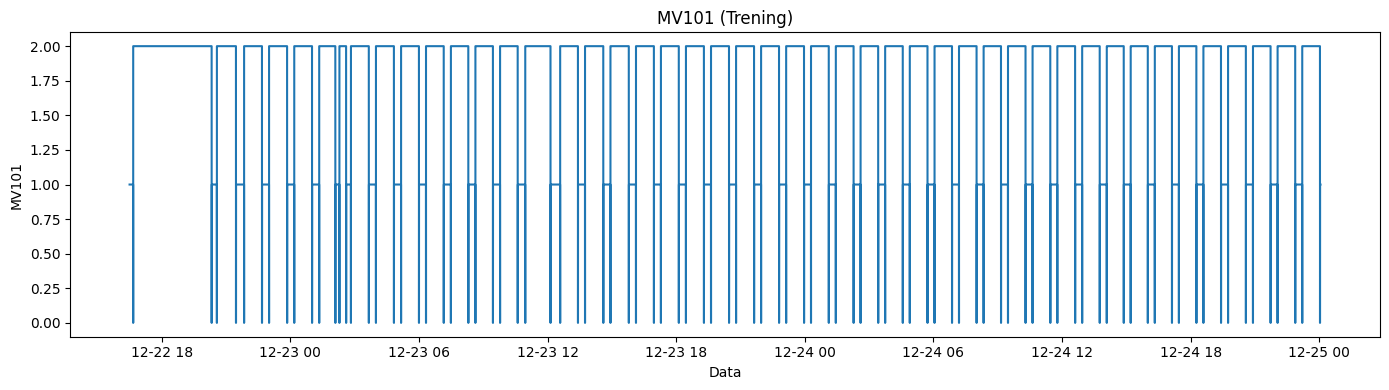

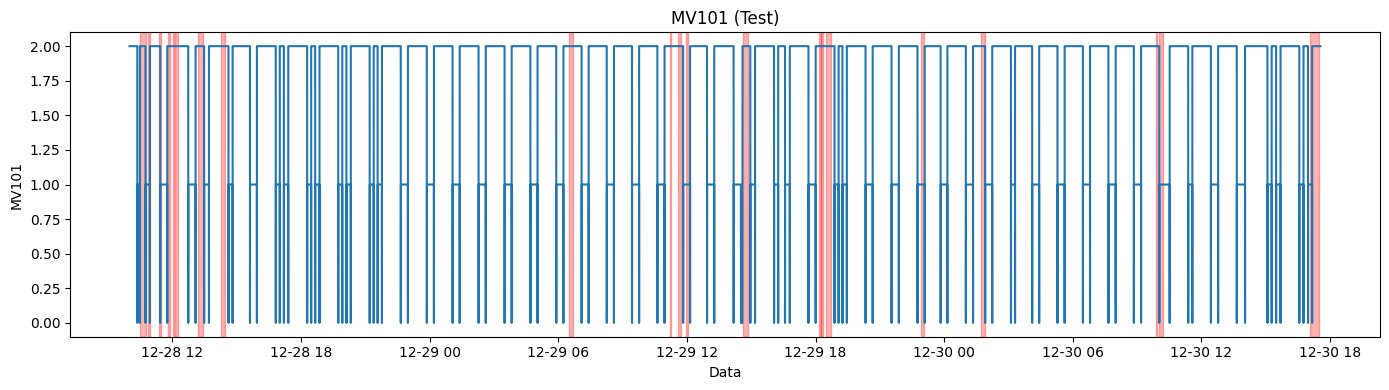

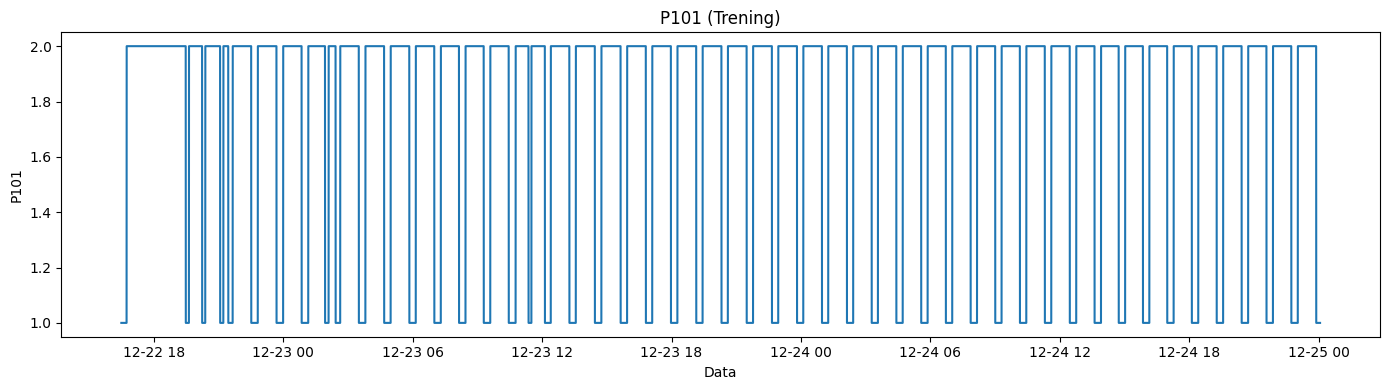

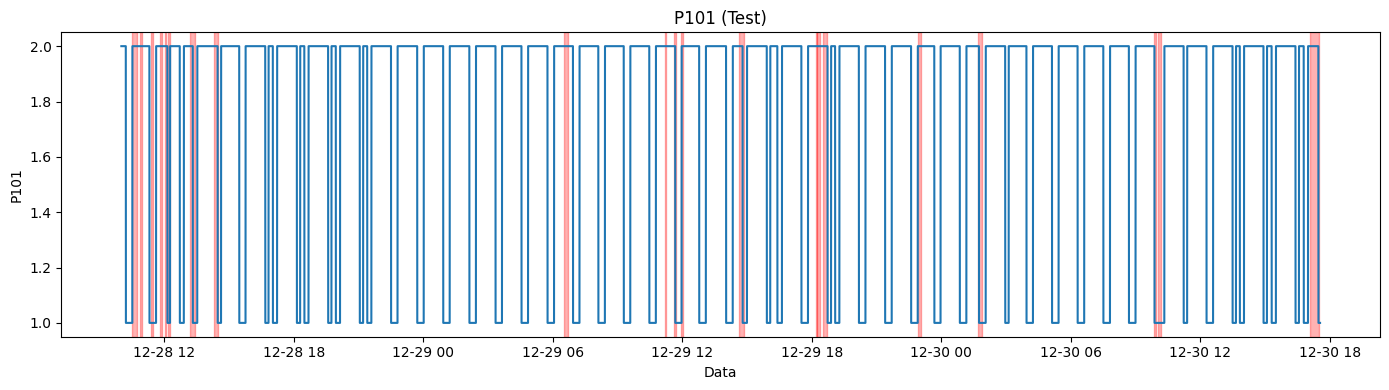

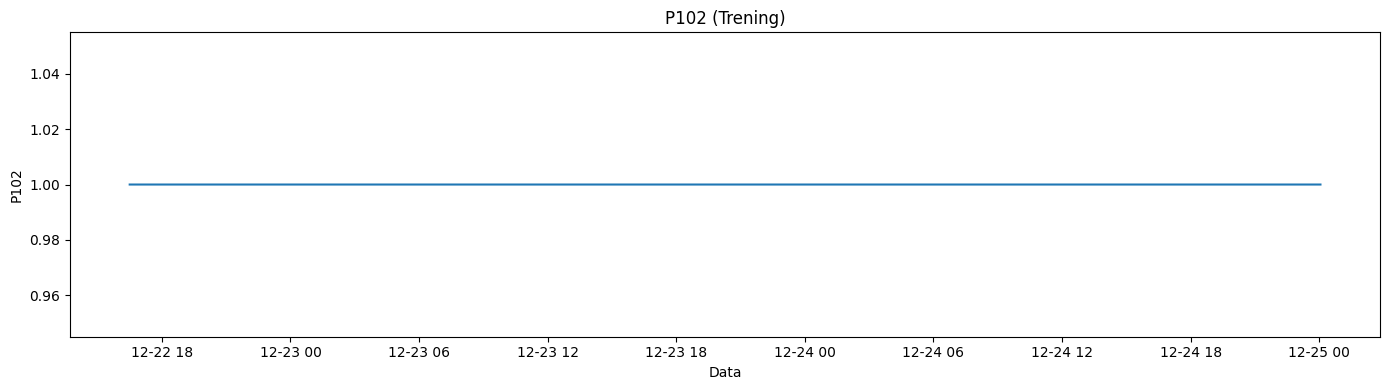

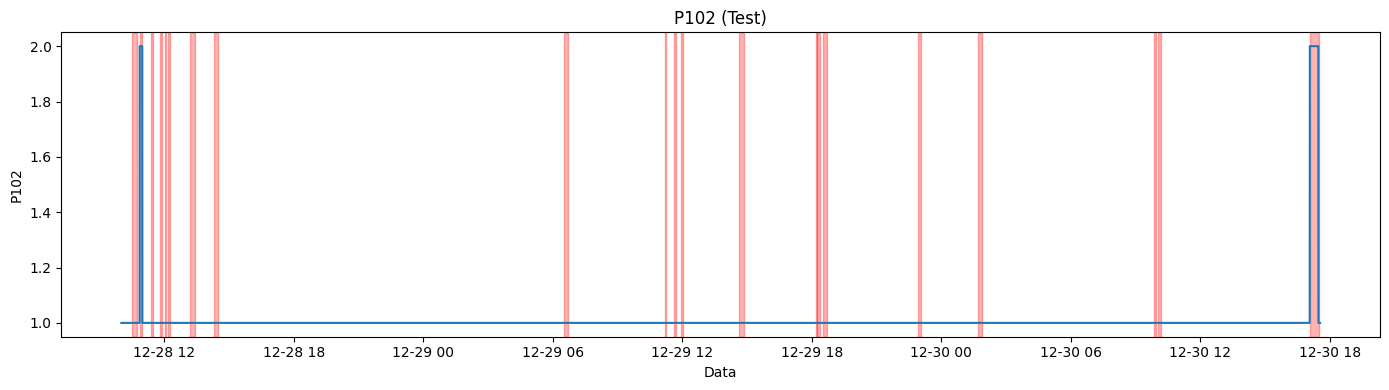

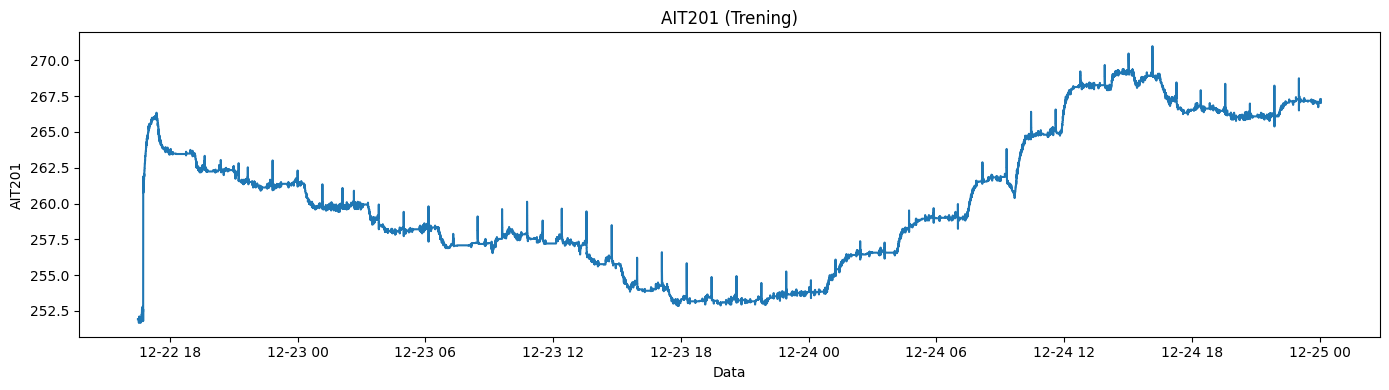

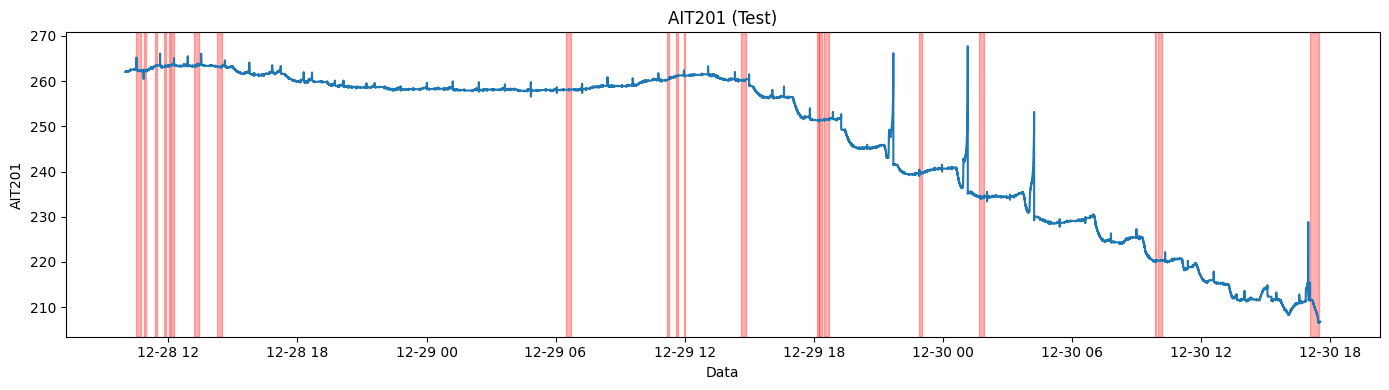

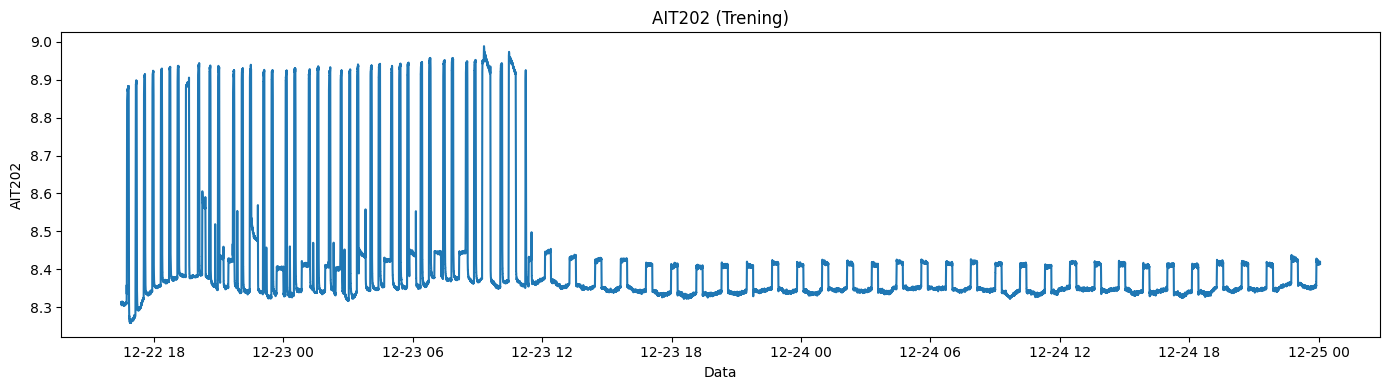

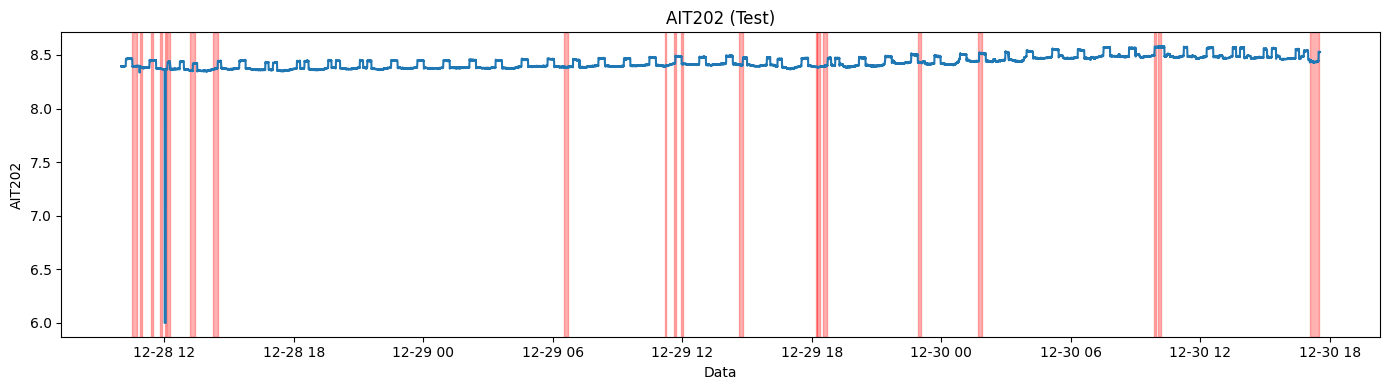

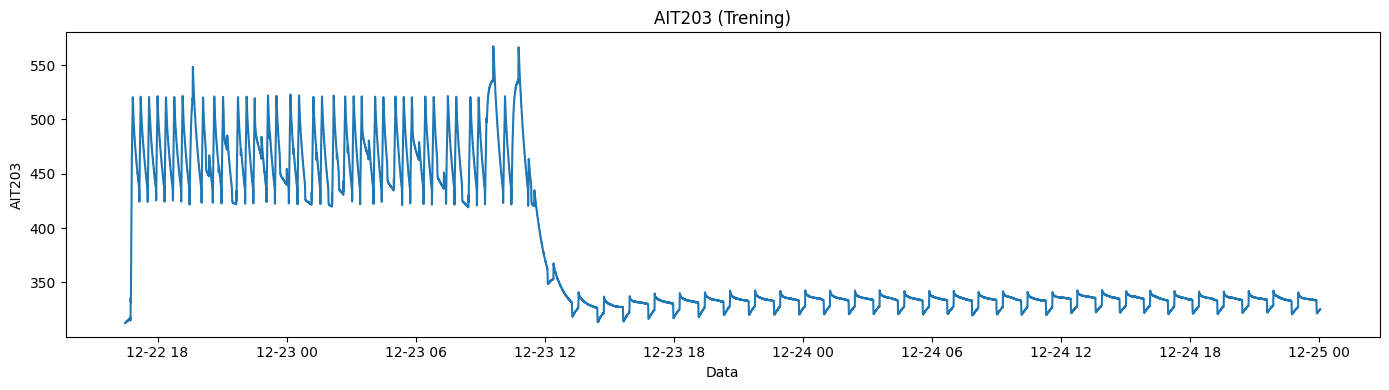

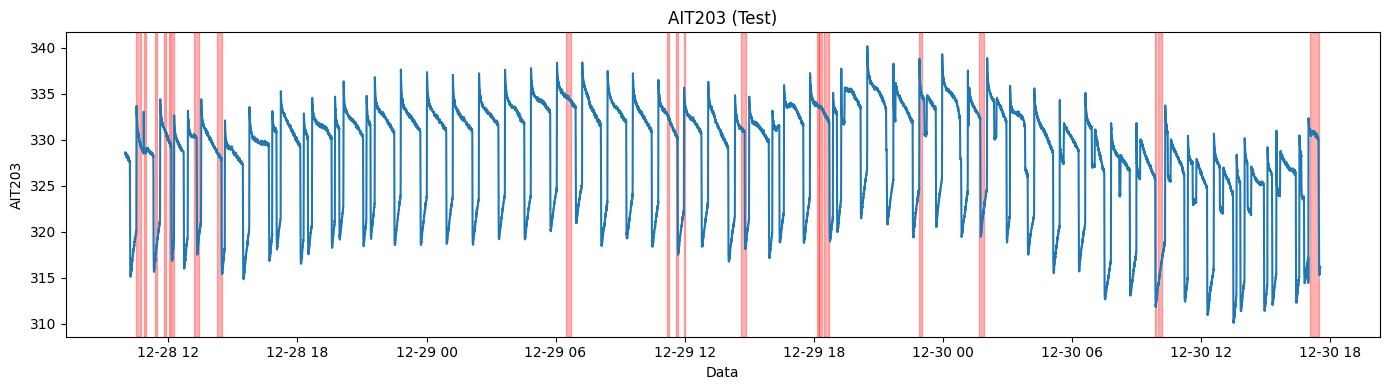

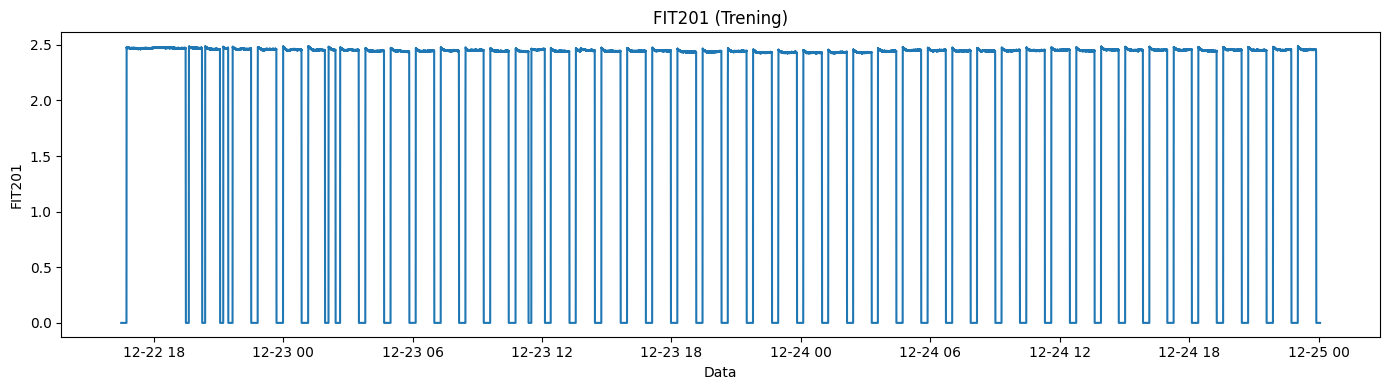

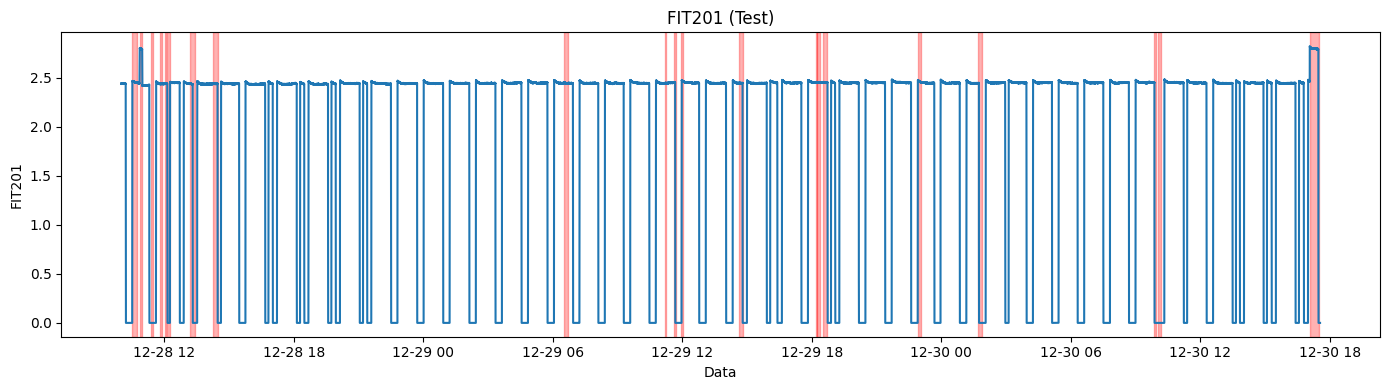

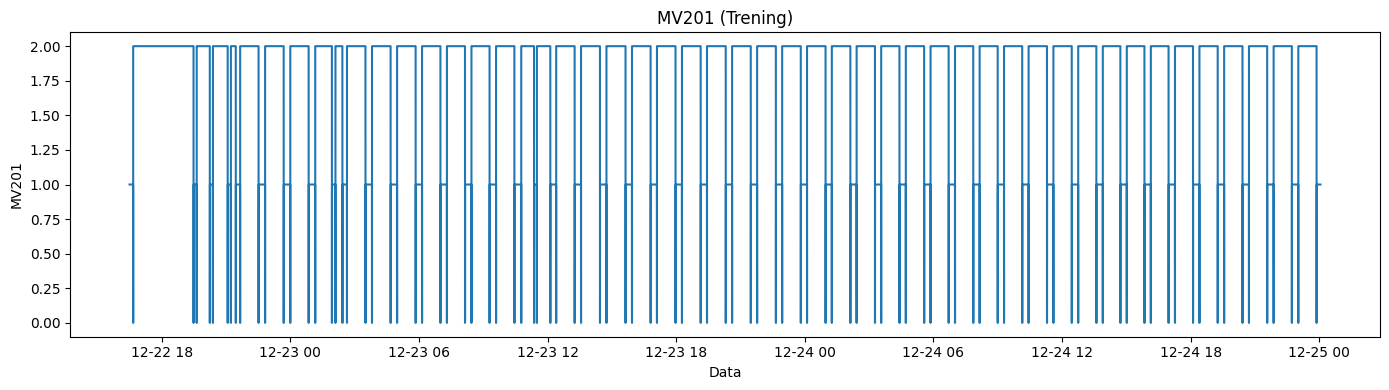

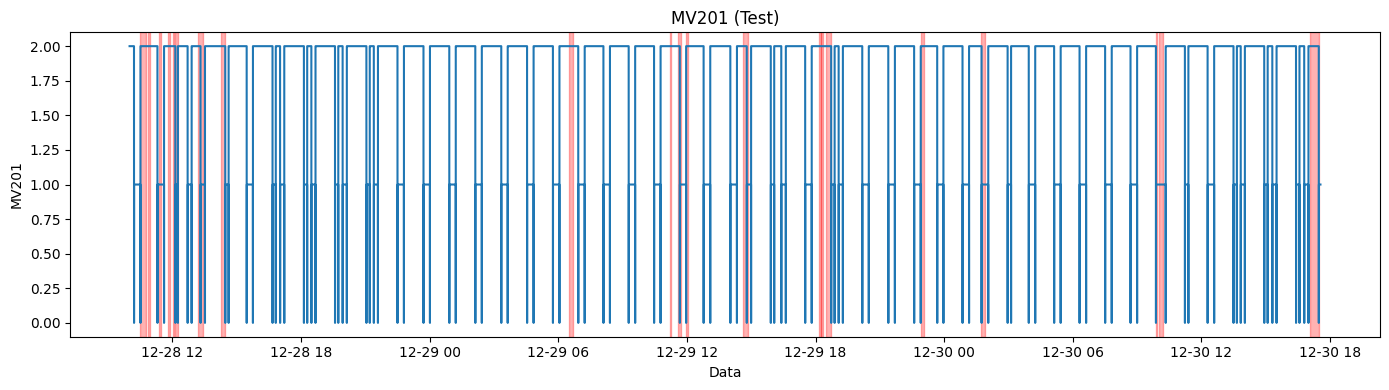

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df2_small = df2.head(200000).copy()
df1_small = df1.head(200000).copy()

# Format daty
df2_small['Timestamp'] = pd.to_datetime(df2_small['Timestamp'].str.strip(),
                                        format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
df1_small['Timestamp'] = pd.to_datetime(df1_small.iloc[:, 0].astype(str).str.strip(),
                                        format='%d/%m/%Y %I:%M:%S %p', errors='coerce')

sensor_columns = [col for col in df2_small.columns if col not in ['Timestamp', 'Normal/Attack']]
num_sensors_to_plot = 10

for sensor in sensor_columns[:num_sensors_to_plot]:

    plt.figure(figsize=(14, 4))
    plt.plot(df2_small['Timestamp'], df2_small[sensor])
    plt.title(f'{sensor} (Trening)')
    plt.ylabel(sensor)
    plt.xlabel('Data')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 4))
    plt.plot(df1_small['Timestamp'], df1_small[sensor])
    plt.title(f'{sensor} (Test)')
    plt.ylabel(sensor)
    plt.xlabel('Data')

    # Zaznaczenie okresów anomalii
    anomaly_col = df1_small.columns[-1]
    labels = df1_small[anomaly_col].values
    timestamps = df1_small['Timestamp'].values

    start_idx = None
    for i in range(len(labels)):
        if labels[i] == 'Attack' and start_idx is None:
            start_idx = i  # początek nowego przedziału
        elif (labels[i] != 'Attack' or i == len(labels)-1) and start_idx is not None:
            end_idx = i-1 if labels[i] != 'Attack' else i  # koniec przedziału
            plt.axvspan(timestamps[start_idx], timestamps[end_idx], color='red', alpha=0.3)
            start_idx = None  

    plt.tight_layout()
    plt.show()